
<h1 align=center><font size = 5> <center>文本分析与挖掘</center> </font></h1> 

<h2 align=center><font size = 4><center>实验二、文本预处理和词袋表示</center></font></h2>
<h2 align=center><font size = 2><center>浙江工业大学计算机科学与技术学院</center></font></h2>

## 一、实验目的

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li>熟悉基本词袋表示</li>
<li>TF-IDF 权重计算</li>

## 二、实验内容
<div class="alert alert-block alert-info" style="margin-top: 20px">
<li>英文数据词袋表示</li>
<li>中文词袋表示</li>



### 1. 英文数据词袋表示



<b>a.调用 Part1 中实现的预处理函数 EngPreprocess()对以下文本样例集进行预处理得到预处理后的文本数据集。</b>

文本样例集
<li>Doc1:The sky is blue and beautiful.</li>
<li>Doc2:Love this blue and beautiful sky!</li>
<li>Doc3:The quick brown fox jumps over the lazy dog.</li>

In [14]:
from experiment_1 import EngPreprocess

doc1="The sky is blue and beautiful."
doc2="Love this blue and beautiful sky!"
doc3="The quick brown fox jumps over the lazy dog."


实现两种格式输出：
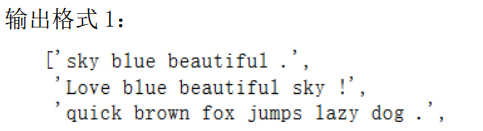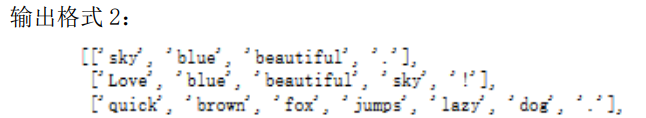

In [2]:
words1=EngPreprocess(doc1,True,stopword_remove=True)
words2=EngPreprocess(doc2,True,stopword_remove=True)
words3=EngPreprocess(doc3,True,stopword_remove=True)
sentence1=' '.join(words1)
sentence2=' '.join(words2)
sentence3=' '.join(words3)

result1=[sentence1,sentence2,sentence3]
result2=[words1,words2,words3]
print('输出格式1：',result1)
print('输出格式2：',result2)

输出格式1： ['sky blue beautiful .', 'Love blue beautiful sky !', 'quick brown fox jumps lazy dog .']
输出格式2： [['sky', 'blue', 'beautiful', '.'], ['Love', 'blue', 'beautiful', 'sky', '!'], ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', '.']]


<b>b.对以上数据集实现三种向量化表示：布尔型、词频、TF-IDF；</b>

#### （1）布尔型

In [3]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(binary=True)#变为bool型矩阵
cv_matrix=cv.fit_transform(result1)

vocab = cv.get_feature_names() 
cv_matrix = cv_matrix.toarray() 
pd.DataFrame(cv_matrix, columns=vocab)

,beautiful,blue,brown,dog,fox,jumps,lazy,love,quick,sky
0,1,1,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,1,0,1
2,0,0,1,1,1,1,1,0,1,0


#### （2）词频

In [4]:
cv2=CountVectorizer()
cv_matrix2=cv2.fit_transform(result1)

vocab2 = cv2.get_feature_names() 
cv_matrix2 = cv_matrix2.toarray() 
pd.DataFrame(cv_matrix2, columns=vocab)

,beautiful,blue,brown,dog,fox,jumps,lazy,love,quick,sky
0,1,1,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,1,0,1
2,0,0,1,1,1,1,1,0,1,0


<div class="alert alert-success alertsuccess" style="margin-top: 10px">
结果分析和讨论：以为词语出现的次数都为1，所以布尔型和词频型向量表示展示的效果一样

#### （3）TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(norm='l2', use_idf=True, smooth_idf=True) 
tv_matrix = tv.fit_transform(result1) 
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names() 
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,beautiful,blue,brown,dog,fox,jumps,lazy,love,quick,sky
0,0.58,0.58,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.58
1,0.46,0.46,0.00,0.00,0.00,0.00,0.00,0.6,0.00,0.46
2,0.00,0.00,0.41,0.41,0.41,0.41,0.41,0.0,0.41,0.00


<b>c.对一个新的文档” The brown fox is quick and the blue dog is lazy!”进行同样的预处理，并用步骤 b 中得到的（基于词频）模型进行向量化表示。
    
观察并讨论：新文档中出现了训练集中没有的词会怎么样？</b>

In [6]:
new_doc = 'The brown fox is quick and the blue dog is lazy!'
pd.DataFrame(np.round(tv.transform([new_doc]).toarray(), 2),columns=tv.get_feature_names())

,beautiful,blue,brown,dog,fox,jumps,lazy,love,quick,sky
0,0.0,0.32,0.42,0.42,0.42,0.0,0.42,0.0,0.42,0.0


<div class="alert alert-success alertsuccess" style="margin-top: 10px">
结果分析和讨论：出现了训练集中没有的词时，就不会进行统计和展示了

<b>d. 对保存在 nips12 文件夹中的文档数据进行预处理，并进行 TF-IDF 向量表示。该文件夹包含了 2012 年发表在 NIPS 会议上的论文，每个文件对应一篇论文。</b>

##### 第一步 读取数据

In [7]:
import os
data_dir='./nips12'
data_list=[]
for file in os.listdir(data_dir):
    file = data_dir + "\\" + file
    filein = open(file, "rb")
    sentence=""
    
    for line in filein:
        line=str(line.strip())
        line=eval(line.strip('b'))
        sentence=sentence+line  
    words=EngPreprocess(sentence,True,stopword_remove=True)
    fin_sentence=' '.join(words)
    data_list.append(fin_sentence)
    filein.close()

##### 第二步 进行TF-IDF 向量表示

In [8]:
import pandas as pd
 
pd.options.display.max_columns =100
pd.options.display.max_rows = 30

In [9]:
tv = TfidfVectorizer(norm='l2', use_idf=True, smooth_idf=True) 
tv_matrix = tv.fit_transform(data_list) 
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names() 
pd.DataFrame(np.round(tv_matrix, 5), columns=vocab)

,00,000,0000,0001,0001500015e,000350,00041o0,000420,00043figure,0005,00050000,00079,0008,0009,000branches,000h,000na,000synaptic,001,0010,0015,0017,0017figure,0018,002,0020,0022,0025,003,0030,003oo2oo10025ooe1005050,004,0040,0047,004o0,005,005026,005032,005052,0052,005esynapse,005v,006,0060,006error,0075,0076figure,0079,008,0080,...,ßinserting,ßld,ßldpx,ßlet,ßmodel,ßnote,ßo8304oo880,ßoo,ßproof,ßreferences,ßs,ßsn,ßsup,ßthat,ßthe,ßtheorem,ßthis,ßupdate,ßw,ßwe,ßxl,ßzinotice,ßß,ña,ñbm,ñd,ñda,õ0,õ00550500,õ2,õ4,õ5,õ6,õ7,õ8,ø1,ø2,ø5,ø9,øal,øi,øld,øli3,øn,øo,øof,øt,øtixi,øx,øøø
0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.05433,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.01569,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.01977,0.01462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.06932,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01231,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.02756,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### 2.中文词袋表示

中文文本样例集
<li>1.家乡名叫箐口村，属贵州省毕节市大方县猫场镇。张凌生于 1985 年，童年时跟一群留守的孩子玩。长到 8 岁，娘送他去村小。</li>
<li>2.大学录取通知单，是去猫场赶集的亲戚带回箐口村的。这在箐口村，是从来没有过的事。</li>
<li>3. 在这环境里他读完了六年级，接着到猫场中学读初中，再到乡政府所在地读高中。那年
月，猫场镇能考上大学的极少，但张凌奇迹般地考上了。</li>

In [10]:
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 

stopwords="[’!\"#$%&\'()*+,-。，/:;<=>?@[\\]^_`{|}~]='']"
stopwords_list=list(stopwords)
#去除标点

def ChTokenize(text):
    text=jieba.cut(text)
    filtered_word=[i for i in text if i not in stopwords_list ]
    return filtered_word

text_list=["家乡名叫箐口村，属贵州省毕节市大方县猫场镇。张凌生于1985 年，童年时跟一群留守的孩子玩。长到8岁，娘送他去村小。",
          "大学录取通知单，是去猫场赶集的亲戚带回箐口村的。这在箐口村，是从来没有过的事。",
          " 在这环境里他读完了六年级，接着到猫场中学读初中，再到乡政府所在地读高中。那年月，猫场镇能考上大学的极少，但张凌奇迹般地考上了。"]



#### a.调用 ChTokenize()进行分词后，对中文语料集实现三向量化表示：布尔型、词频、TF-IDF。


#### (1) 布尔型

In [11]:
cv=CountVectorizer(tokenizer=ChTokenize,binary=True)#变为bool型矩阵
cv_matrix=cv.fit_transform(text_list)

vocab = cv.get_feature_names() 
cv_matrix = cv_matrix.toarray() 
pd.DataFrame(cv_matrix, columns=vocab)

,,1985,8,一群,中学,乡政府,了,事,亲戚,从来,他,但,六年级,再,初中,到,去,口村,名叫,在,大学,大方县,奇迹般地,娘送,孩子,家乡,属,岁,带回,年,张凌,录取,所在地,接着,时,是,月,村小,极少,毕节市,没有,猫场,玩,环境,生于,留守,的,童年,箐,考上,能,读,读完,贵州省,赶集,跟,过,这,通知单,那年,里,镇,长到,高中
0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0
2,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,0,1


#### (2) 词频

In [12]:
cv=CountVectorizer(tokenizer=ChTokenize)
cv_matrix=cv.fit_transform(text_list)

vocab = cv.get_feature_names() 
cv_matrix = cv_matrix.toarray() 
pd.DataFrame(cv_matrix, columns=vocab)

,,1985,8,一群,中学,乡政府,了,事,亲戚,从来,他,但,六年级,再,初中,到,去,口村,名叫,在,大学,大方县,奇迹般地,娘送,孩子,家乡,属,岁,带回,年,张凌,录取,所在地,接着,时,是,月,村小,极少,毕节市,没有,猫场,玩,环境,生于,留守,的,童年,箐,考上,能,读,读完,贵州省,赶集,跟,过,这,通知单,那年,里,镇,长到,高中
0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,2,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0,1,1,0,0,0,0,3,0,2,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0
2,1,0,0,0,1,1,2,0,0,0,1,1,1,1,1,2,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,2,0,1,0,0,1,0,0,2,1,2,1,0,0,0,0,1,0,1,1,1,0,1


#### (3) TF-IDF

In [13]:
tv = TfidfVectorizer(tokenizer=ChTokenize, lowercase=False) 
tv_matrix = tv.fit_transform(text_list) 
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names() 
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,,1985,8,一群,中学,乡政府,了,事,亲戚,从来,他,但,六年级,再,初中,到,去,口村,名叫,在,大学,大方县,奇迹般地,娘送,孩子,家乡,属,岁,带回,年,张凌,录取,所在地,接着,时,是,月,村小,极少,毕节市,没有,猫场,玩,环境,生于,留守,的,童年,箐,考上,能,读,读完,贵州省,赶集,跟,过,这,通知单,那年,里,镇,长到,高中
0,0.15,0.2,0.2,0.2,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.15,0.15,0.2,0.00,0.00,0.2,0.00,0.2,0.2,0.2,0.2,0.2,0.00,0.2,0.15,0.00,0.00,0.00,0.2,0.00,0.00,0.2,0.00,0.2,0.00,0.12,0.2,0.00,0.2,0.2,0.12,0.2,0.15,0.00,0.00,0.00,0.00,0.2,0.00,0.2,0.00,0.00,0.00,0.00,0.00,0.15,0.2,0.00
1,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.21,0.21,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.31,0.0,0.16,0.16,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.21,0.0,0.00,0.21,0.00,0.00,0.0,0.41,0.00,0.0,0.00,0.0,0.21,0.12,0.0,0.00,0.0,0.0,0.37,0.0,0.31,0.00,0.00,0.00,0.00,0.0,0.21,0.0,0.21,0.16,0.21,0.00,0.00,0.00,0.0,0.00
2,0.12,0.0,0.0,0.0,0.16,0.16,0.32,0.00,0.00,0.00,0.12,0.16,0.16,0.16,0.16,0.32,0.00,0.00,0.0,0.12,0.12,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.12,0.00,0.16,0.16,0.0,0.00,0.16,0.0,0.16,0.0,0.00,0.19,0.0,0.16,0.0,0.0,0.09,0.0,0.00,0.32,0.16,0.32,0.16,0.0,0.00,0.0,0.00,0.12,0.00,0.16,0.16,0.12,0.0,0.16
